In [215]:
#pour installer les packages manquants, exemple:
!pip install tqdm

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [5]:
from tqdm import tqdm

## 0. Sampling from Poisson Distribution

In [6]:
%%latex
\begin{align}
\text{Average succes rate per unit of time} \space \lambda = \frac{1}{40} \\
\end{align}

<IPython.core.display.Latex object>

In [7]:
lambda_ = 1/40
N = 100

In [8]:
#waiting time between two events is given by the exp. distribution.
#the cumulitative exp. distribution compute is used to compute the probability of 
#an occurence of an events within the next x units of times.

#source: https://preshing.com/20111007/how-to-generate-random-timings-for-a-poisson-process/ 
def F(x):
    return 1 - np.exp(x/40*-lambda_)

In [9]:
#after 40mins we highly expect a succes.
print(F(40))
#after 2secs, we are less likely to have any succes.
print(F(0.2))

0.0246900879717
0.000124992187825


In [10]:
#random points from the y-axis (probabilities)
Y = np.random.uniform(size=N)

In [11]:
#corresponding x-values, waiting times
T = -np.log(1-Y) / lambda_

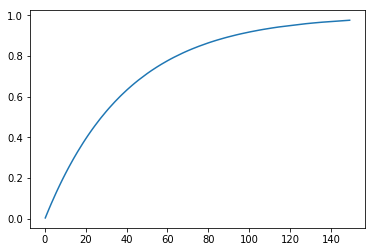

Text(0,0.5,'probabily')

In [12]:
pp.plot(T[np.argsort(T)], Y[np.argsort(T)])
pp.show()
pp.xlabel('time in minutes')
pp.ylabel('probabily')

In [13]:
#notice how the observed average rate is almost equal to lambda_
print(T.mean())

46.0130267585


In [14]:
#we sampled waiting times, the corresponding time serie is:
Ts = np.cumsum(T)

In [15]:
events = np.repeat('A', N)

In [16]:
sampled_data = pd.DataFrame(data={'time': Ts, 'event': events})

# Sampling from Poisson Nets

![alt text](./PoissonNets_examples.PNG)

## a. Sampling from a Single Node Poisson Nets

### Model description

In [22]:
%%latex
\begin{align}
nodes = A \\
edges = \emptyset \\
w_{A,0} = \frac{1}{40} \\
\lambda_{A}(t) = exp(w_{A,0}) = exp(\frac{1}{40}) \\
\end{align}

<IPython.core.display.Latex object>

In [23]:
W0 = 2.5
lambda_ = np.exp(W0)
time_serie_length = 100

The waiting times between two adjecents events are iid and distributed exponentially with rate lambda

In [24]:
lambda_

12.182493960703473

In [25]:
def sample_from_poisson(lambda_, N):
    Y = np.random.uniform(size=N)
    X_waitingTimes = -np.log(1-Y) / lambda_
    Time_serie = np.cumsum(X_waitingTimes)
    return Time_serie, X_waitingTimes, Y

In [26]:
A_time_serie, waiting_times, probs = sample_from_poisson(lambda_, 100)

In [27]:
1/lambda_

0.0820849986238988

In [28]:
#sampled data, as expected the average waiting time is lambda^-1.
waiting_times.mean()

0.08842920029605647

## Likelihood

In [29]:
%%latex
\begin{align}
\text{general formula:} \space
\mathcal{L}(\textbf{W}, M \mid T) = p(T \mid W, M) = \prod_{i=1}^{V} p(\textbf{t}_i \mid \{ \textbf{t}_j \mid j \in \pi(i)\})
\end{align}

<IPython.core.display.Latex object>

In [30]:
%%latex
\begin{align}
\text{general formula:} \space
\mathcal{L}(W_{A,0}, {A} \mid Sampled Data) = p(\textbf{t}_A) \\
= \prod_{l=1}^{100} p(t_{l} \mid t_{l-1}, W_{A,0}, M) \\
= \prod_{l=1}^{100} \lambda_{l, 1} \times exp(-\lambda_{l, 1} \tau_{l, 1}) \\
\tau_{l, 1} = t_{l} - t_{l-1}, \space (k{_l} = 0) \\
\lambda_{l, 1} = exp(W_{A, 0}), \space \pi(A) = \emptyset \\
\Rightarrow \mathcal{L}(W_{A,0}, {A} \mid Sampled Data) = exp(W_{A, 0})^{100} \times exp(-\lambda_{l, 1} \times (t_1 - t_{100}))
\end{align}

<IPython.core.display.Latex object>

In [31]:
A_time_serie_shifted_right = np.roll(A_time_serie, 1)
A_time_serie_shifted_right[0] = 0

In [32]:
taus = A_time_serie - A_time_serie_shifted_right

In [33]:
taus

array([ 0.02087315,  0.09414696,  0.13549076,  0.00334016,  0.11633503,
        0.07315775,  0.23627293,  0.01423804,  0.07219587,  0.00384316,
        0.07051402,  0.09080718,  0.29985512,  0.06521275,  0.00529261,
        0.03904808,  0.01434947,  0.13751235,  0.03642878,  0.04092569,
        0.02387409,  0.19673861,  0.04011973,  0.08818848,  0.11055688,
        0.02596411,  0.12331475,  0.01743714,  0.45284016,  0.01501594,
        0.02808856,  0.03868533,  0.00634978,  0.04093471,  0.0206691 ,
        0.05700558,  0.00523621,  0.01803752,  0.16996097,  0.23636438,
        0.23304194,  0.02508357,  0.00652873,  0.06616435,  0.10535268,
        0.00574438,  0.19401857,  0.1537024 ,  0.27137363,  0.00266909,
        0.06697263,  0.02814325,  0.05138633,  0.2171792 ,  0.05936852,
        0.05962807,  0.07465361,  0.27418916,  0.24348789,  0.47808207,
        0.08714705,  0.25829144,  0.02204656,  0.0528393 ,  0.08302498,
        0.18283689,  0.05815883,  0.03271333,  0.05739108,  0.01

In [34]:
np.prod(lambda_ * np.exp(-lambda_ * (taus))) #<- likelihood >> 1 :(

6.131806910647094e+61

In [35]:
lambda_ * np.exp(-lambda_ * (taus)) #problem each element is a proba in [0, 1]

array([  9.44714845,   3.86922896,   2.3382076 ,  11.69672094,
         2.95278608,   4.99659207,   0.68496091,  10.24249434,
         5.05548739,  11.62526472,   5.16013802,   4.02990198,
         0.31569359,   5.50439049,  11.42178909,   7.57078649,
        10.2285997 ,   2.28132557,   7.81626311,   7.39957838,
         9.10800778,   1.10874979,   7.47258957,   4.160538  ,
         3.16812988,   8.87903116,   2.71208782,   9.8509913 ,
         0.04896143,  10.14588663,   8.65217926,   7.60431741,
        11.27563156,   7.39876576,   9.47066228,   6.08319384,
        11.429639  ,   9.7792038 ,   1.53641465,   0.68419819,
         0.71245959,   8.97479068,  11.25107614,   5.44094761,
         3.37549366,  11.35909911,   1.14610583,   1.87296251,
         0.44663768,  11.79273723,   5.38763413,   8.64641702,
         6.51421256,   0.86434413,   5.91057643,   5.89191698,
         4.90636284,   0.43157767,   0.62732548,   0.03600016,
         4.21366001,   0.52380597,   9.31306206,   6.39

In [36]:
#same as :
L = (lambda_ ** 100) * np.exp(-lambda_ * (A_time_serie[99] - 0))

In [37]:
L

6.1318069106470746e+61

# **likelihood is >> 1, bad.**

## b. Sampling from a two Nodes Poisson Nodes

### Model description

In [44]:
%%latex
\begin{align}
nodes = A, B\\
edges = (A, B) \\
w_{A,0} = \frac{1}{40} \\
w_{B,0} = 2.3, \space w_{B,1} = 0.45 \\
\phi = 1
\end{align}

<IPython.core.display.Latex object>

In [227]:
#model parameters
W_A0 = 1/40
W_B0 = 2.3
W_B1 = 0.45

phi = 1 #time window [t-phi, t)
lambda_A = np.exp(W_A0)

First, lets sample A

In [75]:
A_t,_,_ = sample_from_poisson(lambda_A, N)

In [77]:
A_t = pd.Series(A_t)

Now, lets compute the rate function of B

In [78]:
#parent event count function of node B, rolling group values within 1 sec window time, 
#count is applied to compute the number of events in the time window.
n_B = A_t.rolling(1).count()

In [81]:
lambda_emp_B_A = n_B/phi #emperical rate of node B w.r.t parent node A.

In [83]:
lambda_B = np.exp(W_B0) * ((1+lambda_emp_B_A) ** W_B1) #rate function of Node B, see formula (1)

In [84]:
#since the parent count function is constant, the rate function
#of B is constant.
lambda_B

0     13.625135
1     13.625135
2     13.625135
3     13.625135
4     13.625135
5     13.625135
6     13.625135
7     13.625135
8     13.625135
9     13.625135
10    13.625135
11    13.625135
12    13.625135
13    13.625135
14    13.625135
15    13.625135
16    13.625135
17    13.625135
18    13.625135
19    13.625135
20    13.625135
21    13.625135
22    13.625135
23    13.625135
24    13.625135
25    13.625135
26    13.625135
27    13.625135
28    13.625135
29    13.625135
        ...    
70    13.625135
71    13.625135
72    13.625135
73    13.625135
74    13.625135
75    13.625135
76    13.625135
77    13.625135
78    13.625135
79    13.625135
80    13.625135
81    13.625135
82    13.625135
83    13.625135
84    13.625135
85    13.625135
86    13.625135
87    13.625135
88    13.625135
89    13.625135
90    13.625135
91    13.625135
92    13.625135
93    13.625135
94    13.625135
95    13.625135
96    13.625135
97    13.625135
98    13.625135
99    13.625135
Length: 100, dtype: floa

In [85]:
A_t

0       0.105450
1       1.312323
2       1.486367
3       2.001767
4       2.141780
5       2.245169
6       2.801867
7       3.664100
8       4.398672
9       4.631350
10      4.913800
11      5.550322
12      7.376507
13      9.052990
14     10.288371
15     10.636662
16     13.960707
17     16.613847
18     17.246911
19     18.235729
20     19.746054
21     21.796659
22     21.799301
23     23.133212
24     24.033939
25     26.174445
26     26.194560
27     26.254710
28     27.897125
29     29.323153
         ...    
70     78.377681
71     81.051937
72     81.766412
73     83.504281
74     84.500359
75     84.962152
76     85.791706
77     86.419272
78     87.046141
79     87.330873
80     90.339412
81     92.231990
82     96.656127
83     99.565390
84    100.100947
85    102.311372
86    103.279461
87    105.433436
88    105.541243
89    105.691657
90    106.277003
91    108.041693
92    110.593404
93    111.030200
94    111.433726
95    113.663615
96    113.824265
97    113.9733

In [303]:
#lets sample B using reject sampling, as described §3.(b)
t = A_t[0]
t_end = A_t.values[-1]
B_t = np.array([])
while t < t_end:
    Y = np.random.uniform()
    #sample waiting time
    tau = -np.log(1-Y) / lambda_B[0]
    if t + tau <= t_end:
        t += tau
        B_t = np.append(B_t, t)
    else:
        break
        

In [304]:
B_t = pd.Series(B_t)
t = pd.concat([A_t, B_t])

In [305]:
sampled_data = pd.DataFrame(data={'time': t, 'event': 'B'})

In [306]:
sampled_data.set_index('time', inplace = True)
sampled_data.sort_index(inplace=True)
sampled_data.loc[A_t.values, 'event'] = 'A'

In [307]:
sampled_data

,event
time,
0.105450,A
0.396793,B
0.441940,B
0.460742,B
0.486905,B
0.564588,B
0.568524,B
0.607369,B
0.612958,B


In [308]:
sampled_data['event'].value_counts()

B    1572
A     100
Name: event, dtype: int64

### Likelihood, plis halp

In [309]:
sampled_data.reset_index(inplace=True)

In [310]:
sampled_data

,time,event
0,0.105450,A
1,0.396793,B
2,0.441940,B
3,0.460742,B
4,0.486905,B
5,0.564588,B
6,0.568524,B
7,0.607369,B
8,0.612958,B
9,0.691664,B


In [326]:
len(B_t) * np.log(lambda_B[0]) - lambda_B[0] * B_t.values[-1]

2548.0309783215334

In [344]:
taus_A_t = (A_t - A_t.shift())
taus_A_t[0] = A_t[0]

In [350]:
taus_B_t = (B_t - B_t.shift())

In [351]:
taus_B_t[0] = B_t[0]

In [349]:
np.prod(np.exp(-lambda_A * taus_A_t)) * (lambda_A ** 100)

1.4125365513519472e-50

In [353]:
np.prod(np.exp(-lambda_B * taus_B_t))

1.3624188764849167e-40

In [319]:
(lambda_B[0] ** len(B_t)) * np.exp(-lambda_B[0] * B_t.values[-1])

C:\Users\MOTALY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\MOTALY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [318]:
(lambda_A ** len(A_t)) * np.exp(-lambda_A * A_t.values[-1]) * \
(lambda_B[0] ** len(B_t)) * np.exp(-lambda_B[0] * B_t.values[-1])

C:\Users\MOTALY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\MOTALY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

## UGHHHH 

## c. Sampling from two nodes: A <-> B

In [189]:
%%latex
\begin{align}
nodes = A, B\\
edges = (A, B), (B, A) \\
w_{A,0} = \frac{1}{40}, \space W_{A,1} = 3 \\
w_{B,0} = 2.3, \space w_{B,1} = 0.45 \\
\phi = 1
\end{align}

<IPython.core.display.Latex object>

In [253]:
W_A0 = 1/400
W_A1 = 1/730

W_B0 = 1/831
W_B1 = 1/981

W = [[W_A0, W_A1], [W_B0, W_B1]]

phi = 1

In [254]:
#at t = 0, no parent event has taken place yet
n_A = [0]
n_B = [0]

n = [n_A, n_B]

In [255]:
lambda_A = [np.exp(W_A0)]
lambda_B = [np.exp(W_B0)]

lambdas = np.array([lambda_A, lambda_B])

In [256]:
t_A = [12, 19, 40, 55, 100]
t_B = [2, 33, 50, 90, 100]
lambda_constant_wins = np.array([t_A, t_B])
T = [[], []]

In [257]:
parent_count_changed = [[0], [0]]
unchanged_until_i = [0, 0]
t = 0

In [258]:
while t < 100:
    Y_A, Y_B = np.random.uniform(size=2)
    #sample waiting time
    tau_A = -np.log(1-Y_A) / lambda_A[-1]
    tau_B = -np.log(1-Y_B) / lambda_B[-1]
    
    e_i = np.argmin([tau_A, tau_B])
    unchanged_until_time = [t_A, t_B][e_i][unchanged_until_i[e_i]]
    
    if t + [tau_A, tau_B][e_i] <= unchanged_until_time:
        #print('{} waiting {}'.format(t, [tau_A, tau_B][e_i]))
        t += [tau_A, tau_B][e_i]
        T[e_i].append(t)
        n[1-e_i].append(np.sum([t_i >= t-phi and t_i <= t for t_i in T[1-e_i]]))
        parent_count_changed[1-e_i].append(t)
        lambda_emp = n[1-e_i][-1]/phi
        
        [lambda_A, lambda_B][1-e_i].append(np.exp(W[1-e_i][0]) * ((1+lambda_emp) ** W[1-e_i][1]))
    else:
        if(t + [tau_A, tau_B][e_i] <= 100):
            unchanged_until_i[e_i] += 1
        t = unchanged_until_time

In [259]:
A_t, B_t = pd.Series(T[0]), pd.Series(T[1])

In [260]:
t_s = pd.concat([A_t, B_t])

In [397]:
sampled_data = pd.DataFrame(data={'time': pd.to_datetime(t_s, unit='s',), 'event': 'B'})
sampled_data.set_index('time', inplace = True)
sampled_data.sort_index(inplace=True)
sampled_data.loc[pd.to_datetime(A_t.values, unit='s'), 'event'] = 'A'

sampled_data.index -= pd.to_datetime(0)

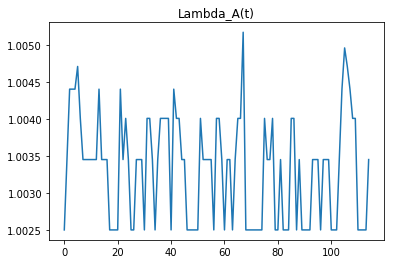

In [263]:
#as you can see, rate function of A is piecewise constant
plt.plot(lambda_A)
plt.title('Lambda_A(t)')
plt.show()

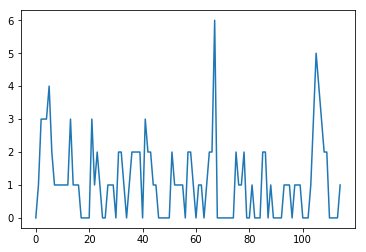

In [264]:
#parent count of A, fellow the same 
plt.plot(n[0])
plt.title('')
plt.show()

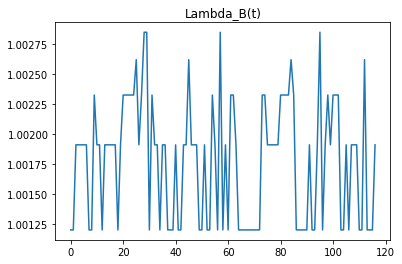

In [265]:
#as you can see, rate function of A is piecewise constant
plt.plot(lambda_B)
plt.title('Lambda_B(t)')
plt.show()

## CALCULER LA VRAISEMBLENSE MAITENANT HAHAHA

In [401]:
sampled_data['event'] = sampled_data['event'].apply(ord)

In [402]:
parent_count_of_A = sampled_data[sampled_data['event'] == ord('B')].rolling('1S', closed='both').count()

In [403]:
lambda_A_piece_wise = dict(zip(n_A, lambda_A))

In [404]:
lambda_A_piece_wise

{0: 1.0025031276057952,
 1: 1.0034554731153464,
 2: 1.0040129788632774,
 3: 1.004408723322294,
 4: 1.0047157939910165,
 5: 1.0049667586826334,
 6: 1.0051789952123342}

In [405]:
parent_count_of_A['event'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [443]:
parent_count_of_A.reset_index(inplace=True)

In [446]:
parent_count_of_A['time'] = parent_count_of_A['time'].dt.total_seconds()

In [467]:
lambda_duration_df = parent_count_of_A.groupby('event')['time'].apply(lambda df: np.sum(df - df.shift()))

In [469]:
lambda_duration_df = lambda_duration_df.reset_index()

In [479]:
parent_count_of_A.groupby('event').count()

,time
event,
1.0,41
2.0,40
3.0,22
4.0,6
5.0,3
6.0,2


In [502]:
lambda_duration_df['count'] = parent_count_of_A.groupby('event')['time'].count().values

In [471]:
lambda_duration_df['lambda'] = lambda_duration_df['event'].apply(lambda e: lambda_A_piece_wise.get(e))

In [503]:
lambda_duration_df

,event,time,lambda,count
0,1.0,98.424362,1.003455,41
1,2.0,92.581505,1.004013,40
2,3.0,85.168311,1.004409,22
3,4.0,80.629834,1.004716,6
4,5.0,60.631448,1.004967,3
5,6.0,0.146809,1.005179,2


In [518]:
np.prod((lambda_duration_df['lambda'] ** lambda_duration_df['count']) * np.exp(-lambda_duration_df['lambda'] * lambda_duration_df['time']))

1.1862511368699399e-182

### revoir la formule de L ou alors l'échentillonage est mal fait, jsp jpp